In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [3]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

file_path = r"C:\Users\manas\OneDrive\Desktop\datasets\heart+disease\processed.cleveland.data"

df = pd.read_csv(file_path, names=column_names, na_values='?')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [9]:
df_cleaned = df.dropna()

print("\nMissing values after handling:\n", df_cleaned.isnull().sum())
print(f"\nOriginal rows: {df.shape[0]}, Rows after dropping: {df_cleaned.shape[0]}")


Missing values after handling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Original rows: 303, Rows after dropping: 297


In [10]:
df_processed = df_cleaned.copy()
df_processed['target'] = df_processed['target'].apply(lambda x: 1 if x > 0 else 0)

print("\nUnique values in 'target' after transformation:", df_processed['target'].unique())

print("\nValue counts of 'target':\n", df_processed['target'].value_counts())


Unique values in 'target' after transformation: [0 1]

Value counts of 'target':
 target
0    160
1    137
Name: count, dtype: int64


In [11]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

df_encoded = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("\nDataFrame after One-Hot Encoding (head):\n")
print(df_encoded.head())

print("\nShape after One-Hot Encoding:", df_encoded.shape)

X = df_encoded.drop('target', axis=1)

y = df_encoded['target']

print(f"\nShape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")


DataFrame after One-Hot Encoding (head):

    age  trestbps   chol  thalach  oldpeak  target  sex_1.0  cp_2.0  cp_3.0  \
0  63.0     145.0  233.0    150.0      2.3       0     True   False   False   
1  67.0     160.0  286.0    108.0      1.5       1     True   False   False   
2  67.0     120.0  229.0    129.0      2.6       1     True   False   False   
3  37.0     130.0  250.0    187.0      3.5       0     True   False    True   
4  41.0     130.0  204.0    172.0      1.4       0    False    True   False   

   cp_4.0  ...  restecg_1.0  restecg_2.0  exang_1.0  slope_2.0  slope_3.0  \
0   False  ...        False         True      False      False       True   
1    True  ...        False         True       True       True      False   
2    True  ...        False         True       True       True      False   
3   False  ...        False        False      False      False       True   
4   False  ...        False         True      False      False      False   

   ca_1.0  ca_2.0  

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (237, 20)
Shape of X_test: (60, 20)
Shape of y_train: (237,)
Shape of y_test: (60,)


In [15]:
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
model.fit(X_train, y_train)
print("\nLogistic Regression model trained successfully!")


Logistic Regression model trained successfully!


In [17]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.8333
Precision: 0.8750
Recall: 0.7500
F1-Score: 0.8077
ROC-AUC: 0.9408

Confusion Matrix:
[[29  3]
 [ 7 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



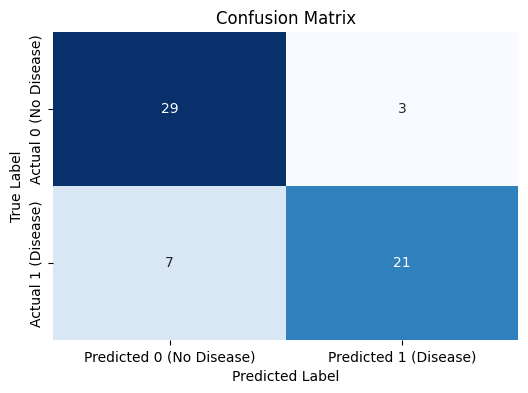

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0 (No Disease)', 'Predicted 1 (Disease)'],
            yticklabels=['Actual 0 (No Disease)', 'Actual 1 (Disease)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("\nRandom Forest model trained successfully!")
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest model trained successfully!

Random Forest Metrics:
Accuracy: 0.8500
Precision: 0.8519
Recall: 0.8214
F1-Score: 0.8364
ROC-AUC: 0.9124

Random Forest Confusion Matrix:
[[28  4]
 [ 5 23]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [23]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42)

accuracy_scores = cross_val_score(rf_model_cv, X, y, cv=skf, scoring='accuracy')
precision_scores = cross_val_score(rf_model_cv, X, y, cv=skf, scoring='precision')
recall_scores = cross_val_score(rf_model_cv, X, y, cv=skf, scoring='recall')
f1_scores = cross_val_score(rf_model_cv, X, y, cv=skf, scoring='f1')
roc_auc_scores = cross_val_score(rf_model_cv, X, y, cv=skf, scoring='roc_auc')

print("\nRandom Forest Cross-Validation Results")
print(f"Accuracy: {accuracy_scores.mean():.4f} (+/- {accuracy_scores.std():.4f})")
print(f"Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std():.4f})")
print(f"Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std():.4f})")
print(f"F1-Score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")
print(f"ROC-AUC: {roc_auc_scores.mean():.4f} (+/- {roc_auc_scores.std():.4f})")


Random Forest Cross-Validation Results
Accuracy: 0.8145 (+/- 0.0755)
Precision: 0.8184 (+/- 0.0978)
Recall: 0.7725 (+/- 0.0876)
F1-Score: 0.7933 (+/- 0.0843)
ROC-AUC: 0.8938 (+/- 0.0607)
